In [1]:
import os
os.environ['J_NOTEBOOK'] = '1'

from preprocess.preprocess import *
import PARAMETERS
import sys
sys.path.append('./preprocess/')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from confusion_matrix_pretty_print import print_confusion_matrix
from pathlib import Path

%matplotlib inline


PARAMETERS.PREPROCESS_OPTIMIZATION = True

PARAMETERS.LBP_METHOD = 'riu'
PARAMETERS.METHOD = 'get_pyramid_dataset'
PARAMETERS.INTERPOLATION_ALGORITHM = 'lanczos'
PARAMETERS.BALANCE = False
PARAMETERS.N_SCALES = 5
PARAMETERS.GRAY_INTENSITY = True
PARAMETERS.X2SCALE = True
PARAMETERS.FILE_EXTENSION = PARAMETERS.update_file_extension(PARAMETERS)
PARAMETERS.PLOT = False
PARAMETERS.DATASET = 'DRIVE'

pd.DataFrame({k: getattr(PARAMETERS, k) for k in VALID_PARAMETERS.keys()}, index=['Parameters']).head()

,LBP_METHOD,METHOD,INTERPOLATION_ALGORITHM,BALANCE,N_SCALES,GRAY_INTENSITY,X2SCALE
Parameters,riu,get_pyramid_dataset,lanczos,False,5,True,True


### Resultado CV

F1-score 0.685426

Columns: Index(['red_Original', 'red_riu_1:1', 'red_riu_1:2', 'red_riu_1:4',
       'red_riu_1:8', 'red_riu_2:1_1', 'red_riu_2:1_2', 'red_riu_2:1_3',
       'red_riu_2:1_4', 'green_Original', 'green_riu_1:1', 'green_riu_1:2',
       'green_riu_1:4', 'green_riu_1:8', 'green_riu_2:1_1', 'green_riu_2:1_2',
       'green_riu_2:1_3', 'green_riu_2:1_4', 'blue_Original', 'blue_riu_1:1',
       'blue_riu_1:2', 'blue_riu_1:4', 'blue_riu_1:8', 'blue_riu_2:1_1',
       'blue_riu_2:1_2', 'blue_riu_2:1_3', 'blue_riu_2:1_4', 'red_var_1:1',
       'red_var_1:2', 'red_var_1:4', 'red_var_1:8', 'red_var_2:1_1',
       'red_var_2:1_2', 'red_var_2:1_3', 'red_var_2:1_4', 'green_var_1:1',
       'green_var_1:2', 'green_var_1:4', 'green_var_1:8', 'green_var_2:1_1',
       'green_var_2:1_2', 'green_var_2:1_3', 'green_var_2:1_4', 'blue_var_1:1',
       'blue_var_1:2', 'blue_var_1:4', 'blue_var_1:8', 'blue_var_2:1_1',
       'blue_var_2:1_2', 'blue_var_2:1_3', 'blue_var_2:1_4'],
      dtype='object')


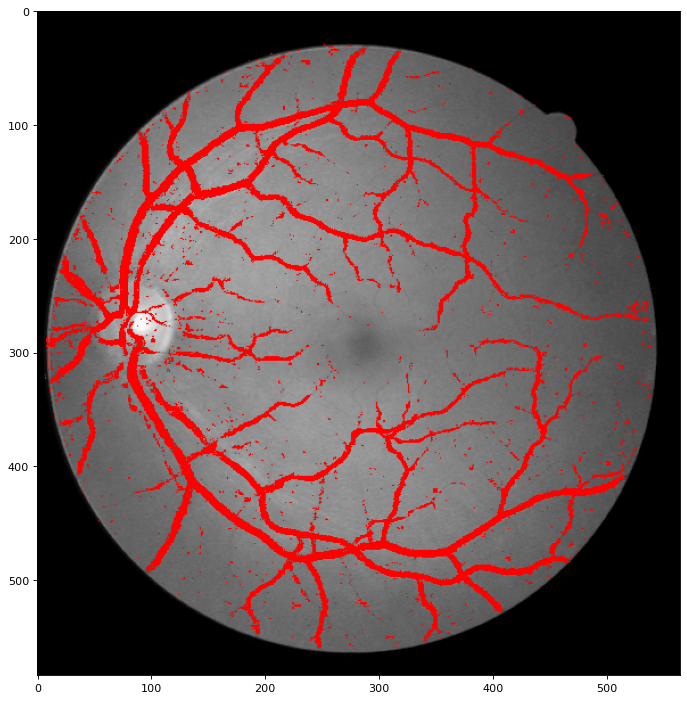

Accuracy score: 0.9292555186111174

F1 score: 0.7211952246541113

Confusion matrix:

     t/p      0     1 
        0 1141617 45928 
        1 50476 124686 
Sensivity: 0.7118324750802114
Specificity: 0.9613252550429668


(0.929, 0.721, 1141617, 45928, 50476, 124686)

In [2]:
from main import main
PARAMETERS.PLOT = True

main(lgb='Num', all_lbp=['riu', 'var'], plot_once=True, channels=(1, 2), recurrence=False)

In [3]:
import pandas as pd

df_train = pd.DataFrame()
df_test = pd.DataFrame()

#for conf in ['_blue', '_blue_lbp_gb', '_green', '_green_lbp_gb']:
for conf in ['_blue_lbp_gb', '_green_lbp_gb']:

    df_train_riu = pd.read_pickle(f'../DB/DRIVE/extra_features/preprocess_optimization{conf}/train_train_riu_get_pyramid_dataset_lanczos_balance-False_scales-5_x2-True_gray-intensity-True.pkl', compression='gzip')
    df_test_riu = pd.read_pickle(f'../DB/DRIVE/extra_features/preprocess_optimization{conf}/train_test_riu_get_pyramid_dataset_lanczos_balance-False_scales-5_x2-True_gray-intensity-True.pkl', compression='gzip')

    df_train_riu.columns = [c + '_riu' if c not in ['Original', 'label'] else c for c in df_train_riu.columns]
    df_test_riu.columns = [c + '_riu' if c not in ['Original', 'label'] else c for c in df_test_riu.columns]

    if df_train.shape[0] == 0:
        y_train = df_train_riu['label']
        y_test = df_test_riu['label']
    df_train_riu = df_train_riu.drop(['label'], axis=1)
    df_test_riu = df_test_riu.drop(['label'], axis=1)


    df_train_var = pd.read_pickle(f'../DB/DRIVE/extra_features/preprocess_optimization{conf}/train_train_var_get_pyramid_dataset_lanczos_balance-False_scales-5_x2-True_gray-intensity-True.pkl', compression='gzip')
    df_test_var = pd.read_pickle(f'../DB/DRIVE/extra_features/preprocess_optimization{conf}/train_test_var_get_pyramid_dataset_lanczos_balance-False_scales-5_x2-True_gray-intensity-True.pkl', compression='gzip')

    df_train_var.columns = [c + '_var' if c not in ['Original', 'label'] else c for c in df_train_var.columns]
    df_test_var.columns = [c + '_var' if c not in ['Original', 'label'] else c for c in df_test_var.columns]

    df_train_var = df_train_var.drop(['Original', 'label'], axis=1)
    df_test_var = df_test_var.drop(['Original', 'label'], axis=1)

    df_train_temp = pd.concat([df_train_riu, df_train_var], axis=1)
    df_test_temp = pd.concat([df_test_riu, df_test_var], axis=1)
    df_train_temp.columns = [c + conf for c in df_train_temp.columns]
    df_test_temp.columns = [c + conf for c in df_test_temp.columns]

    if df_train.shape[0] > 0:
        df_train_temp.index = df_train.index
        df_test_temp.index = df_test.index
    df_train = pd.concat([df_train, df_train_temp], axis=1)
    df_test = pd.concat([df_test, df_test_temp], axis=1)
    
display(df_train)
display(df_test)

,Original_blue_lbp_gb,1:1_riu_blue_lbp_gb,1:2_riu_blue_lbp_gb,1:4_riu_blue_lbp_gb,1:8_riu_blue_lbp_gb,2:1_1_riu_blue_lbp_gb,2:1_2_riu_blue_lbp_gb,2:1_3_riu_blue_lbp_gb,2:1_4_riu_blue_lbp_gb,1:1_var_blue_lbp_gb,...,2:1_3_riu_green_lbp_gb,2:1_4_riu_green_lbp_gb,1:1_var_green_lbp_gb,1:2_var_green_lbp_gb,1:4_var_green_lbp_gb,1:8_var_green_lbp_gb,2:1_1_var_green_lbp_gb,2:1_2_var_green_lbp_gb,2:1_3_var_green_lbp_gb,2:1_4_var_green_lbp_gb
0,3.0,34.0,8.0,8.0,8.0,1.0,0.0,27.0,18.0,17.008752,...,27.0,27.0,34.970179,2366.455049,2452.908099,1774.988954,3.0,3.0,6.0,4.0
1,3.0,1.0,8.0,8.0,8.0,1.0,1.0,27.0,34.0,49.574616,...,35.0,35.0,54.589251,2366.455049,2452.908099,1774.988954,3.0,4.0,3.0,3.0
2,2.0,35.0,8.0,8.0,8.0,9.0,1.0,27.0,34.0,28.109620,...,35.0,35.0,73.904109,2390.571498,2396.025127,1774.988954,3.0,3.0,4.0,3.0
3,3.0,4.0,8.0,8.0,8.0,1.0,1.0,34.0,34.0,102.533453,...,34.0,35.0,87.514134,2390.571498,2396.025127,1774.988954,1.0,1.0,7.0,13.0
4,3.0,16.0,16.0,8.0,8.0,1.0,2.0,33.0,27.0,74.235429,...,35.0,8.0,87.679605,2372.122827,2396.025127,1774.988954,0.0,0.0,17.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226537,2.0,34.0,34.0,35.0,8.0,16.0,16.0,16.0,16.0,4.784987,...,16.0,16.0,339.349974,411.913183,799.976832,1179.119760,105.0,34.0,54.0,54.0
226538,2.0,35.0,34.0,35.0,8.0,16.0,8.0,16.0,4.0,4.669947,...,16.0,27.0,216.946197,411.913183,799.976832,1179.119760,254.0,3.0,54.0,45.0
226539,2.0,35.0,34.0,34.0,8.0,27.0,34.0,16.0,16.0,4.669947,...,8.0,16.0,159.821459,423.340405,769.846024,1179.119760,173.0,104.0,15.0,4.0
226540,2.0,34.0,34.0,34.0,8.0,35.0,34.0,16.0,16.0,4.784987,...,16.0,24.0,110.285592,423.340405,769.846024,1179.119760,35.0,5.0,2.0,0.0


,Original_blue_lbp_gb,1:1_riu_blue_lbp_gb,1:2_riu_blue_lbp_gb,1:4_riu_blue_lbp_gb,1:8_riu_blue_lbp_gb,2:1_1_riu_blue_lbp_gb,2:1_2_riu_blue_lbp_gb,2:1_3_riu_blue_lbp_gb,2:1_4_riu_blue_lbp_gb,1:1_var_blue_lbp_gb,...,2:1_3_riu_green_lbp_gb,2:1_4_riu_green_lbp_gb,1:1_var_green_lbp_gb,1:2_var_green_lbp_gb,1:4_var_green_lbp_gb,1:8_var_green_lbp_gb,2:1_1_var_green_lbp_gb,2:1_2_var_green_lbp_gb,2:1_3_var_green_lbp_gb,2:1_4_var_green_lbp_gb
0,3.0,27.0,35.0,8.0,8.0,1.0,9.0,34.0,34.0,8.540576,...,35.0,34.0,34.398997,315.689010,1801.462839,1568.031927,2.0,5.0,4.0,3.0
1,3.0,34.0,35.0,8.0,8.0,1.0,9.0,34.0,35.0,4.011545,...,35.0,35.0,24.427897,315.689010,1801.462839,1568.031927,5.0,5.0,3.0,4.0
2,3.0,35.0,18.0,8.0,8.0,9.0,1.0,35.0,34.0,3.715399,...,34.0,34.0,7.085000,315.030495,1801.462839,1568.031927,4.0,2.0,3.0,3.0
3,3.0,35.0,18.0,8.0,8.0,9.0,1.0,34.0,35.0,3.970374,...,35.0,35.0,1.271459,315.030495,1801.462839,1568.031927,4.0,6.0,2.0,1.0
4,3.0,35.0,34.0,8.0,8.0,1.0,1.0,34.0,16.0,2.839092,...,16.0,27.0,6.128713,431.363135,2207.566737,1568.031927,7.0,6.0,16.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226969,4.0,4.0,8.0,8.0,8.0,8.0,8.0,34.0,35.0,36.037325,...,27.0,35.0,40.986932,497.701176,497.373815,428.512230,18.0,28.0,1.0,2.0
226970,3.0,16.0,8.0,8.0,8.0,8.0,27.0,35.0,32.0,31.176642,...,34.0,35.0,41.127693,497.701176,497.373815,428.512230,35.0,32.0,2.0,1.0
226971,3.0,4.0,4.0,8.0,4.0,4.0,34.0,8.0,1.0,33.012700,...,35.0,35.0,63.773086,479.650461,566.545021,485.067545,17.0,13.0,6.0,2.0
226972,3.0,8.0,4.0,8.0,4.0,34.0,27.0,1.0,8.0,35.603141,...,27.0,1.0,21.587353,479.650461,566.545021,485.067545,6.0,3.0,1.0,1.0


Columns: Index(['Original_blue_lbp_gb', '1:1_riu_blue_lbp_gb', '1:2_riu_blue_lbp_gb',
       '1:4_riu_blue_lbp_gb', '1:8_riu_blue_lbp_gb', '2:1_1_riu_blue_lbp_gb',
       '2:1_2_riu_blue_lbp_gb', '2:1_3_riu_blue_lbp_gb',
       '2:1_4_riu_blue_lbp_gb', '1:1_var_blue_lbp_gb', '1:2_var_blue_lbp_gb',
       '1:4_var_blue_lbp_gb', '1:8_var_blue_lbp_gb', '2:1_1_var_blue_lbp_gb',
       '2:1_2_var_blue_lbp_gb', '2:1_3_var_blue_lbp_gb',
       '2:1_4_var_blue_lbp_gb', 'Original_green_lbp_gb',
       '1:1_riu_green_lbp_gb', '1:2_riu_green_lbp_gb', '1:4_riu_green_lbp_gb',
       '1:8_riu_green_lbp_gb', '2:1_1_riu_green_lbp_gb',
       '2:1_2_riu_green_lbp_gb', '2:1_3_riu_green_lbp_gb',
       '2:1_4_riu_green_lbp_gb', '1:1_var_green_lbp_gb',
       '1:2_var_green_lbp_gb', '1:4_var_green_lbp_gb', '1:8_var_green_lbp_gb',
       '2:1_1_var_green_lbp_gb', '2:1_2_var_green_lbp_gb',
       '2:1_3_var_green_lbp_gb', '2:1_4_var_green_lbp_gb'],
      dtype='object')


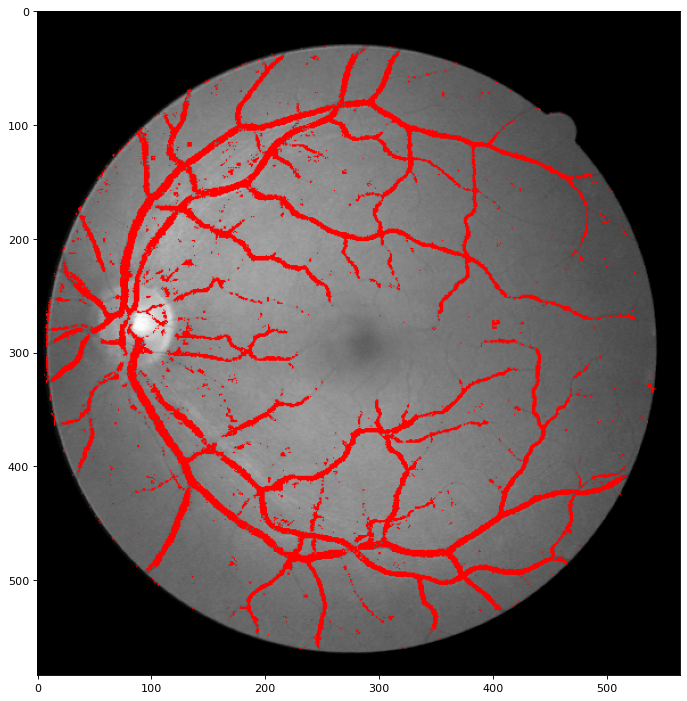

Accuracy score: 0.9321519592986607

F1 score: 0.7169981114229832

Confusion matrix:

     t/p    0.0   1.0 
      0.0 1153128 34417 
      1.0 58040 117122 
Sensivity: 0.6686495929482422
Specificity: 0.9710183614094624


(0.932, 0.717, 1153128, 34417, 58040, 117122)

In [4]:
features = {
    'x_train': df_train,
    'x_test': df_test,
    'y_train': y_train,
    'y_test': y_test
}

main(lgb='Num', features=features, plot_once=True, recurrence=False)

## Combinación con convolución

Columns: Index([  'Original_blue_lbp_gb',    '1:1_riu_blue_lbp_gb',
          '1:2_riu_blue_lbp_gb',    '1:4_riu_blue_lbp_gb',
          '1:8_riu_blue_lbp_gb',  '2:1_1_riu_blue_lbp_gb',
        '2:1_2_riu_blue_lbp_gb',  '2:1_3_riu_blue_lbp_gb',
        '2:1_4_riu_blue_lbp_gb',    '1:1_var_blue_lbp_gb',
          '1:2_var_blue_lbp_gb',    '1:4_var_blue_lbp_gb',
          '1:8_var_blue_lbp_gb',  '2:1_1_var_blue_lbp_gb',
        '2:1_2_var_blue_lbp_gb',  '2:1_3_var_blue_lbp_gb',
        '2:1_4_var_blue_lbp_gb',  'Original_green_lbp_gb',
         '1:1_riu_green_lbp_gb',   '1:2_riu_green_lbp_gb',
         '1:4_riu_green_lbp_gb',   '1:8_riu_green_lbp_gb',
       '2:1_1_riu_green_lbp_gb', '2:1_2_riu_green_lbp_gb',
       '2:1_3_riu_green_lbp_gb', '2:1_4_riu_green_lbp_gb',
         '1:1_var_green_lbp_gb',   '1:2_var_green_lbp_gb',
         '1:4_var_green_lbp_gb',   '1:8_var_green_lbp_gb',
       '2:1_1_var_green_lbp_gb', '2:1_2_var_green_lbp_gb',
       '2:1_3_var_green_lbp_gb', '2:1_4_var_gre

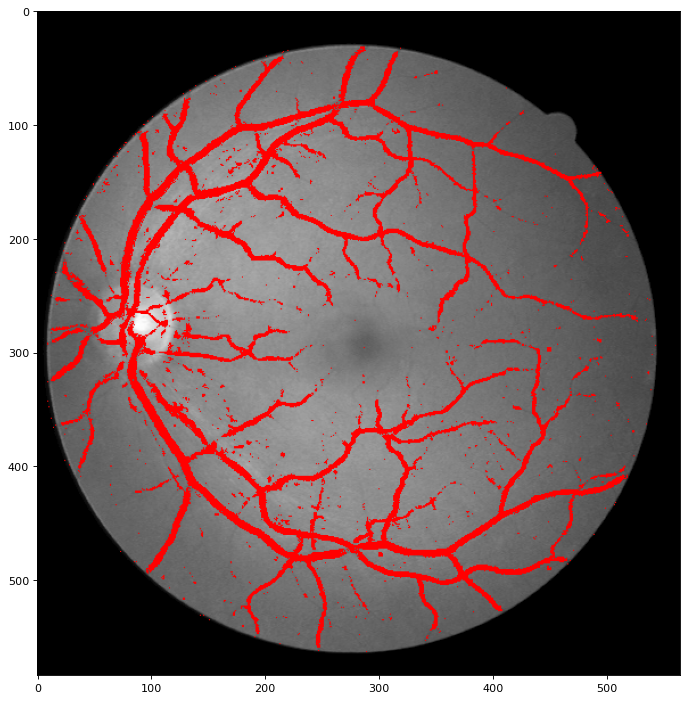

Accuracy score: 0.9354197197196462

F1 score: 0.7363681571174365

Confusion matrix:

     t/p      0     1 
        0 1151798 35747 
        1 52257 122905 
Sensivity: 0.7016647446363937
Specificity: 0.9698984038499594


(0.935, 0.736, 1151798, 35747, 52257, 122905)

In [5]:
import pickle
from os import listdir

PATH = r'/home/fer/Drive/Estudios/Master-IA/TFM/dataset/DRIVE/training/images'
MASK_PATH = r'/home/fer/Drive/Estudios/Master-IA/TFM/dataset/DRIVE/training/mask'
LABELS_PATH = r'/home/fer/Drive/Estudios/Master-IA/TFM/dataset/DRIVE/training/1st_manual'

def load_images():
    paths = [f"{PATH}/{path}" for path in sorted(listdir(PATH))][:14]
    return [np.asarray(Image.open(path).convert('RGB'))[:, :, 1] for path in paths]

def load_masks():
    paths = [f"{MASK_PATH}/{path}" for path in sorted(listdir(MASK_PATH))][:14]
    return [np.asarray(Image.open(path).convert('L')) > 100 for path in paths]

IMAGES = load_images()
MASKS = load_masks()

with open(r'/home/fer/Drive/Estudios/Master-IA/TFM/lbp-pyramid/convolution/outputs/16544931165874937_200_iterations_corrected/population.pkl', 'rb') as f:
    kernels = pickle.load(f)
    
population, fitness = kernels['population'], kernels['fitness']
individual = population[np.argmax(fitness), :]
n_kernels = 6
k_size = (3, 5, 7)

features = [pd.DataFrame()]*14
count = 0
for j, ks in enumerate(k_size):
    k_len = int(ks**2)
    features = [
        pd.concat([feat_df, pd.DataFrame(np.array(
            [cv2.filter2D(img, -1, individual[(count + i*k_len):(count + (i + 1) * k_len)].reshape((ks, ks)))[mask]
             for i in range(n_kernels // len(k_size))]
        ).T, columns=np.arange(j * (n_kernels // len(k_size)), (j + 1) * (n_kernels // len(k_size))))], axis=1)
        for img, mask, feat_df in zip(IMAGES, MASKS, features)
    ]
    count += k_len * (n_kernels // len(k_size))
    
conv_features = pd.concat(features, ignore_index=True)

def load_images_test():
    paths = [f"{PATH}/{path}" for path in sorted(listdir(PATH))][14:]
    return [np.asarray(Image.open(path).convert('RGB'))[:, :, 1] for path in paths]

def load_masks_test():
    paths = [f"{MASK_PATH}/{path}" for path in sorted(listdir(MASK_PATH))][14:]
    return [np.asarray(Image.open(path).convert('L')) > 100 for path in paths]

IMAGES_test = load_images_test()
MASKS_test = load_masks_test()

features_test = [pd.DataFrame()]*14
count = 0
for j, ks in enumerate(k_size):
    k_len = int(ks**2)
    features_test = [
        pd.concat([feat_df, pd.DataFrame(np.array(
            [cv2.filter2D(img, -1, individual[(count + i*k_len):(count + (i + 1) * k_len)].reshape((ks, ks)))[mask]
             for i in range(n_kernels // len(k_size))]
        ).T, columns=np.arange(j * (n_kernels // len(k_size)), (j + 1) * (n_kernels // len(k_size))))], axis=1)
        for img, mask, feat_df in zip(IMAGES_test, MASKS_test, features_test)
    ]
    count += k_len * (n_kernels // len(k_size))
    
conv_features_test = pd.concat(features_test, ignore_index=True)

extra_features = {'train': conv_features, 'test': conv_features_test}


from main import get_channel_features, get_labels
import pandas as pd

temp_train, temp_test = get_channel_features('../', lbp_version=['riu', 'var'], channels=(1, 2))
conv_features.index = temp_train.index
conv_features_test.index = temp_test.index
df_train.index = temp_train.index
df_test.index = temp_test.index
y_train, y_test = get_labels('../')

features = {
    'x_train': pd.concat([df_train, conv_features], axis=1),
    'x_test': pd.concat([df_test, conv_features_test], axis=1),
    'y_train': y_train,
    'y_test': y_test
}

main(lgb='Num', features=features, plot_once=True, recurrence=False)

## Grid search

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold
from main import LGBMNumerical, lgb_f1_score

np.random.seed(1)

gkf = KFold(n_splits=5, shuffle=True, random_state=42).split(X=features['x_train'], y=features['y_train'])

#{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 150, 'num_leaves': 30, 'reg_alpha': 0.5, 'reg_lambda': 0.5}
param_grid = {
    'n_estimators': [150, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.3, 0.5],
    'reg_alpha': [0.3, 0.5],
    'reg_lambda': [0.3, 0.5],
    'num_leaves': [20, 30]
}

lgb_estimator = LGBMNumerical(
    num_leaves=50,
    max_depth=30,
    random_state=42,
    verbose=0,
    # metric='None',
    n_jobs=8,
    # n_estimators=1000,
    colsample_bytree=0.9,
    subsample=0.7,
    learning_rate=0.5,
    force_row_wise=True
)

gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv=gkf)
#lgb_model = gsearch.fit(X=features['x_train'], y=features['y_train'], eval_metric=lgb_f1_score)

#print(lgb_model.best_params_, lgb_model.best_score_)

In [7]:
lgb_estimator_2 = LGBMNumerical(
    num_leaves=30,
    max_depth=5,
    random_state=42,
    verbose=0,
    # metric='None',
    n_jobs=8,
    n_estimators=200,
    colsample_bytree=0.9,
    subsample=0.7,
    learning_rate=0.5,
    reg_alpha=0.3,
    reg_lambda=0.5,
    force_row_wise=True
)
#lgb_estimator_2.fit(x=features['x_train'], y=features['y_train'])
#y_pred = lgb_estimator_2.predict(features['x_test'])

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

#print(f1_score(features['y_test'], y_pred))

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix
from confusion_matrix_pretty_print import print_confusion_matrix
#y_predicted = y_pred
#y_test = features['y_test']
#acc = accuracy_score(y_test, y_predicted)
#f1 = f1_score(y_test, y_predicted)
#mat = confusion_matrix(y_test, y_predicted).ravel()
#print('Accuracy score: ' + str(acc) + '\n')
#print('F1 score: ' + str(f1) + '\n')
#print('Confusion matrix:\n')
#print_confusion_matrix(y_test, y_predicted)
#print(f'Sensivity: {int(mat[3]) / (int(mat[3]) + int(mat[2]))}')
#print(f'Specificity: {int(mat[0]) / (int(mat[0]) + int(mat[1]))}')

In [10]:
params = {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200, 'num_leaves': 30, 'reg_alpha': 0.3, 'reg_lambda': 0.5}

Columns: Index([  'Original_blue_lbp_gb',    '1:1_riu_blue_lbp_gb',
          '1:2_riu_blue_lbp_gb',    '1:4_riu_blue_lbp_gb',
          '1:8_riu_blue_lbp_gb',  '2:1_1_riu_blue_lbp_gb',
        '2:1_2_riu_blue_lbp_gb',  '2:1_3_riu_blue_lbp_gb',
        '2:1_4_riu_blue_lbp_gb',    '1:1_var_blue_lbp_gb',
          '1:2_var_blue_lbp_gb',    '1:4_var_blue_lbp_gb',
          '1:8_var_blue_lbp_gb',  '2:1_1_var_blue_lbp_gb',
        '2:1_2_var_blue_lbp_gb',  '2:1_3_var_blue_lbp_gb',
        '2:1_4_var_blue_lbp_gb',  'Original_green_lbp_gb',
         '1:1_riu_green_lbp_gb',   '1:2_riu_green_lbp_gb',
         '1:4_riu_green_lbp_gb',   '1:8_riu_green_lbp_gb',
       '2:1_1_riu_green_lbp_gb', '2:1_2_riu_green_lbp_gb',
       '2:1_3_riu_green_lbp_gb', '2:1_4_riu_green_lbp_gb',
         '1:1_var_green_lbp_gb',   '1:2_var_green_lbp_gb',
         '1:4_var_green_lbp_gb',   '1:8_var_green_lbp_gb',
       '2:1_1_var_green_lbp_gb', '2:1_2_var_green_lbp_gb',
       '2:1_3_var_green_lbp_gb', '2:1_4_var_gre

/home/fer/anaconda3/envs/TFM/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


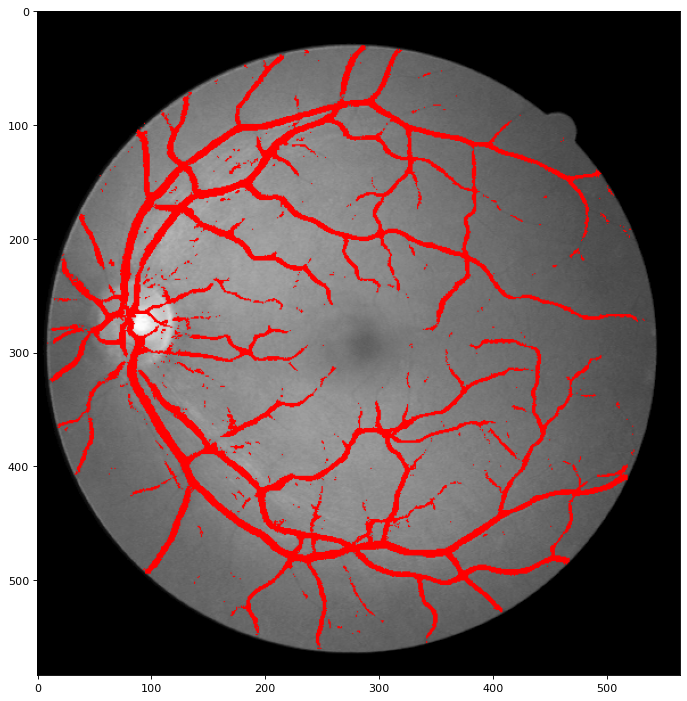

Accuracy score: 0.9404002474486445

F1 score: 0.7587128898184488

Confusion matrix:

     t/p      0     1 
        0 1153799 33746 
        1 47471 127691 
Sensivity: 0.7289880225162992
Specificity: 0.9715833926293319


(0.94, 0.759, 1153799, 33746, 47471, 127691)

In [11]:
main(lgb='Num', features=features, plot_once=True, recurrence=True, hyperparams=params)

## Gray intensity optimization

In [12]:
parameters = [22,  7, 66, 75, 39, 72, 35, 35]

In [13]:
PATH = r'/home/fer/Drive/Estudios/Master-IA/TFM/dataset/DRIVE/training/images'
MASK_PATH = r'/home/fer/Drive/Estudios/Master-IA/TFM/dataset/DRIVE/training/mask'
LABELS_PATH = r'/home/fer/Drive/Estudios/Master-IA/TFM/dataset/DRIVE/training/1st_manual'


def load_images():
    paths = [f"{PATH}/{path}" for path in sorted(listdir(PATH))]
    return [np.asarray(Image.open(path).convert('RGB'))[:, :, 1] for path in paths]

def load_masks():
    paths = [f"{MASK_PATH}/{path}" for path in sorted(listdir(MASK_PATH))]
    return [np.asarray(Image.open(path).convert('L')) > 100 for path in paths]

P_OBJ = Preprocess(
    lbp_radius=1,
    lbp_method=PARAMETERS.LBP_METHOD,
    height={'DRIVE': 608, 'CHASE': 960, 'STARE': 608}[PARAMETERS.DATASET],
    width={'DRIVE': 576, 'CHASE': 1024, 'STARE': 704}[PARAMETERS.DATASET],
    balance=PARAMETERS.BALANCE
)

IMAGES = [Preprocess.img_processing(img, params=parameters) for img in load_images()]
MASKS = load_masks()

In [14]:
img_df = [pd.DataFrame(img[mask]) for img, mask in zip(IMAGES, MASKS)]

gray_intensity_train = pd.concat(img_df[:14], ignore_index=True)
gray_intensity_test = pd.concat(img_df[14:], ignore_index=True)

In [15]:
gray_intensity_train.columns = ['gray_optimized']
gray_intensity_test.columns = ['gray_optimized']
gray_intensity_train.index = features['x_train'].index
gray_intensity_test.index = features['x_test'].index

In [16]:
display(gray_intensity_train)
display(features['x_train'])

,gray_optimized
0,109
1,109
2,109
3,110
4,110
...,...
226537,100
226538,70
226539,100
226540,70


,Original_blue_lbp_gb,1:1_riu_blue_lbp_gb,1:2_riu_blue_lbp_gb,1:4_riu_blue_lbp_gb,1:8_riu_blue_lbp_gb,2:1_1_riu_blue_lbp_gb,2:1_2_riu_blue_lbp_gb,2:1_3_riu_blue_lbp_gb,2:1_4_riu_blue_lbp_gb,1:1_var_blue_lbp_gb,...,3,4,5,recurrence_lbp,recurrence_lbp_1,recurrence_lbp_2,recurrence_lbp_3,recurrence_0,recurrence_1,recurrence_2
0,3.0,34.0,8.0,8.0,8.0,1.0,0.0,27.0,18.0,17.008752,...,46,0,255,240.0,32256.0,8511488.0,-1.073218e+09,1.9,4.5,8.8
1,3.0,1.0,8.0,8.0,8.0,1.0,1.0,27.0,34.0,49.574616,...,35,0,255,240.0,65281.0,14544899.0,-9.711124e+08,1.4,3.6,11.8
2,2.0,35.0,8.0,8.0,8.0,9.0,1.0,27.0,34.0,28.109620,...,24,0,255,243.0,65287.0,16773127.0,-8.053719e+08,0.9,3.6,11.7
3,3.0,4.0,8.0,8.0,8.0,1.0,1.0,34.0,34.0,102.533453,...,14,0,255,227.0,60935.0,12709895.0,5.970330e+07,1.5,5.7,11.8
4,3.0,16.0,16.0,8.0,8.0,1.0,2.0,33.0,27.0,74.235429,...,17,0,255,195.0,32768.0,0.0,0.000000e+00,3.9,5.7,10.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226537,2.0,34.0,34.0,35.0,8.0,16.0,16.0,16.0,16.0,4.784987,...,147,88,158,14.0,254.0,2044.0,3.276400e+04,0.9,2.3,19.0
226538,2.0,35.0,34.0,35.0,8.0,16.0,8.0,16.0,4.0,4.669947,...,149,86,161,30.0,510.0,4094.0,3.276600e+04,0.6,2.1,19.5
226539,2.0,35.0,34.0,34.0,8.0,27.0,34.0,16.0,16.0,4.669947,...,157,86,167,30.0,510.0,8190.0,1.310700e+05,0.3,2.0,24.0
226540,2.0,34.0,34.0,34.0,8.0,35.0,34.0,16.0,16.0,4.784987,...,159,86,164,255.0,65535.0,16777215.0,-1.000000e+00,0.0,2.0,24.8


In [17]:
features['x_train'] = pd.concat([gray_intensity_train, features['x_train']], axis=1)
features['x_test'] = pd.concat([gray_intensity_test, features['x_test']], axis=1)
display(features['x_train'])

,gray_optimized,Original_blue_lbp_gb,1:1_riu_blue_lbp_gb,1:2_riu_blue_lbp_gb,1:4_riu_blue_lbp_gb,1:8_riu_blue_lbp_gb,2:1_1_riu_blue_lbp_gb,2:1_2_riu_blue_lbp_gb,2:1_3_riu_blue_lbp_gb,2:1_4_riu_blue_lbp_gb,...,3,4,5,recurrence_lbp,recurrence_lbp_1,recurrence_lbp_2,recurrence_lbp_3,recurrence_0,recurrence_1,recurrence_2
0,109,3.0,34.0,8.0,8.0,8.0,1.0,0.0,27.0,18.0,...,46,0,255,240.0,32256.0,8511488.0,-1.073218e+09,1.9,4.5,8.8
1,109,3.0,1.0,8.0,8.0,8.0,1.0,1.0,27.0,34.0,...,35,0,255,240.0,65281.0,14544899.0,-9.711124e+08,1.4,3.6,11.8
2,109,2.0,35.0,8.0,8.0,8.0,9.0,1.0,27.0,34.0,...,24,0,255,243.0,65287.0,16773127.0,-8.053719e+08,0.9,3.6,11.7
3,110,3.0,4.0,8.0,8.0,8.0,1.0,1.0,34.0,34.0,...,14,0,255,227.0,60935.0,12709895.0,5.970330e+07,1.5,5.7,11.8
4,110,3.0,16.0,16.0,8.0,8.0,1.0,2.0,33.0,27.0,...,17,0,255,195.0,32768.0,0.0,0.000000e+00,3.9,5.7,10.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226537,100,2.0,34.0,34.0,35.0,8.0,16.0,16.0,16.0,16.0,...,147,88,158,14.0,254.0,2044.0,3.276400e+04,0.9,2.3,19.0
226538,70,2.0,35.0,34.0,35.0,8.0,16.0,8.0,16.0,4.0,...,149,86,161,30.0,510.0,4094.0,3.276600e+04,0.6,2.1,19.5
226539,100,2.0,35.0,34.0,34.0,8.0,27.0,34.0,16.0,16.0,...,157,86,167,30.0,510.0,8190.0,1.310700e+05,0.3,2.0,24.0
226540,70,2.0,34.0,34.0,34.0,8.0,35.0,34.0,16.0,16.0,...,159,86,164,255.0,65535.0,16777215.0,-1.000000e+00,0.0,2.0,24.8


Columns: Index([        'gray_optimized',   'Original_blue_lbp_gb',
          '1:1_riu_blue_lbp_gb',    '1:2_riu_blue_lbp_gb',
          '1:4_riu_blue_lbp_gb',    '1:8_riu_blue_lbp_gb',
        '2:1_1_riu_blue_lbp_gb',  '2:1_2_riu_blue_lbp_gb',
        '2:1_3_riu_blue_lbp_gb',  '2:1_4_riu_blue_lbp_gb',
          '1:1_var_blue_lbp_gb',    '1:2_var_blue_lbp_gb',
          '1:4_var_blue_lbp_gb',    '1:8_var_blue_lbp_gb',
        '2:1_1_var_blue_lbp_gb',  '2:1_2_var_blue_lbp_gb',
        '2:1_3_var_blue_lbp_gb',  '2:1_4_var_blue_lbp_gb',
        'Original_green_lbp_gb',   '1:1_riu_green_lbp_gb',
         '1:2_riu_green_lbp_gb',   '1:4_riu_green_lbp_gb',
         '1:8_riu_green_lbp_gb', '2:1_1_riu_green_lbp_gb',
       '2:1_2_riu_green_lbp_gb', '2:1_3_riu_green_lbp_gb',
       '2:1_4_riu_green_lbp_gb',   '1:1_var_green_lbp_gb',
         '1:2_var_green_lbp_gb',   '1:4_var_green_lbp_gb',
         '1:8_var_green_lbp_gb', '2:1_1_var_green_lbp_gb',
       '2:1_2_var_green_lbp_gb', '2:1_3_var_gre

/home/fer/anaconda3/envs/TFM/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


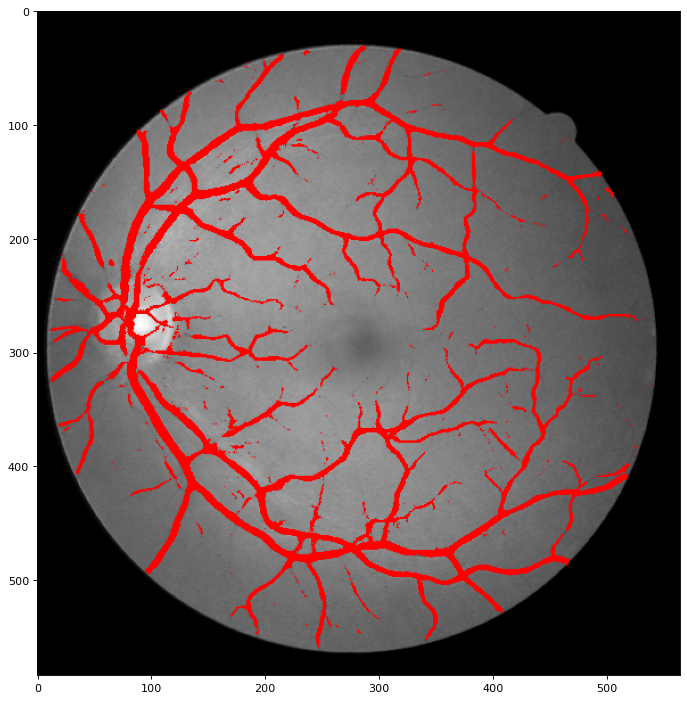

Accuracy score: 0.9405741659799208

F1 score: 0.7614966395118014

Confusion matrix:

     t/p      0     1 
        0 1152450 35095 
        1 45885 129277 
Sensivity: 0.7380424978020347
Specificity: 0.9704474356761218


(0.941, 0.761, 1152450, 35095, 45885, 129277)

In [18]:
main(lgb='Num', features=features, plot_once=True, recurrence=True, hyperparams=params)

## Gray intensity optimization - Green-Blue

In [19]:
parameters_gb = [23,  7, 64, 65, 40, 54, 38, 42]

In [21]:
def load_images_b():
    paths = [f"{PATH}/{path}" for path in sorted(listdir(PATH))]
    return [np.asarray(Image.open(path).convert('RGB'))[:, :, 2] for path in paths]

IMAGES_G = [Preprocess.img_processing(img, params=parameters_gb) for img in load_images()]
IMAGES_B = [Preprocess.img_processing(img, params=parameters_gb) for img in load_images_b()]
MASKS = load_masks()

In [23]:
img_df_g = [pd.DataFrame(img[mask]) for img, mask in zip(IMAGES_G, MASKS)]
img_df_b = [pd.DataFrame(img[mask]) for img, mask in zip(IMAGES_B, MASKS)]

gray_intensity_train_g = pd.concat(img_df_g[:14], ignore_index=True)
gray_intensity_test_g = pd.concat(img_df_g[14:], ignore_index=True)
gray_intensity_train_g.columns = ['gray_optimized_g']
gray_intensity_test_g.columns = ['gray_optimized_g']
gray_intensity_train_g.index = features['x_train'].index
gray_intensity_test_g.index = features['x_test'].index

gray_intensity_train_b = pd.concat(img_df_b[:14], ignore_index=True)
gray_intensity_test_b = pd.concat(img_df_b[14:], ignore_index=True)
gray_intensity_train_b.columns = ['gray_optimized_b']
gray_intensity_test_b.columns = ['gray_optimized_b']
gray_intensity_train_b.index = features['x_train'].index
gray_intensity_test_b.index = features['x_test'].index

display(gray_intensity_train_g)

,gray_optimized_g
0,115
1,115
2,114
3,115
4,115
...,...
226537,92
226538,72
226539,92
226540,72


In [24]:
features['x_train'] = pd.concat([gray_intensity_train_g, gray_intensity_train_b, df_train, conv_features], axis=1)
features['x_test'] = pd.concat([gray_intensity_test_g, gray_intensity_test_b, df_test, conv_features_test], axis=1)
display(features['x_train'])

,gray_optimized_g,gray_optimized_b,Original_blue_lbp_gb,1:1_riu_blue_lbp_gb,1:2_riu_blue_lbp_gb,1:4_riu_blue_lbp_gb,1:8_riu_blue_lbp_gb,2:1_1_riu_blue_lbp_gb,2:1_2_riu_blue_lbp_gb,2:1_3_riu_blue_lbp_gb,...,2:1_1_var_green_lbp_gb,2:1_2_var_green_lbp_gb,2:1_3_var_green_lbp_gb,2:1_4_var_green_lbp_gb,0,1,2,3,4,5
0,115,101,3.0,34.0,8.0,8.0,8.0,1.0,0.0,27.0,...,3.0,3.0,6.0,4.0,0,34,0,46,0,255
1,115,101,3.0,1.0,8.0,8.0,8.0,1.0,1.0,27.0,...,3.0,4.0,3.0,3.0,0,37,0,35,0,255
2,114,101,2.0,35.0,8.0,8.0,8.0,9.0,1.0,27.0,...,3.0,3.0,4.0,3.0,0,46,0,24,0,255
3,115,101,3.0,4.0,8.0,8.0,8.0,1.0,1.0,34.0,...,1.0,1.0,7.0,13.0,0,55,0,14,0,255
4,115,95,3.0,16.0,16.0,8.0,8.0,1.0,2.0,33.0,...,0.0,0.0,17.0,20.0,0,56,0,17,0,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226537,92,69,2.0,34.0,34.0,35.0,8.0,16.0,16.0,16.0,...,105.0,34.0,54.0,54.0,46,0,108,147,88,158
226538,72,53,2.0,35.0,34.0,35.0,8.0,16.0,8.0,16.0,...,254.0,3.0,54.0,45.0,44,0,105,149,86,161
226539,92,54,2.0,35.0,34.0,34.0,8.0,27.0,34.0,16.0,...,173.0,104.0,15.0,4.0,38,3,97,157,86,167
226540,72,54,2.0,34.0,34.0,34.0,8.0,35.0,34.0,16.0,...,35.0,5.0,2.0,0.0,39,0,88,159,86,164


Columns: Index([      'gray_optimized_g',       'gray_optimized_b',
         'Original_blue_lbp_gb',    '1:1_riu_blue_lbp_gb',
          '1:2_riu_blue_lbp_gb',    '1:4_riu_blue_lbp_gb',
          '1:8_riu_blue_lbp_gb',  '2:1_1_riu_blue_lbp_gb',
        '2:1_2_riu_blue_lbp_gb',  '2:1_3_riu_blue_lbp_gb',
        '2:1_4_riu_blue_lbp_gb',    '1:1_var_blue_lbp_gb',
          '1:2_var_blue_lbp_gb',    '1:4_var_blue_lbp_gb',
          '1:8_var_blue_lbp_gb',  '2:1_1_var_blue_lbp_gb',
        '2:1_2_var_blue_lbp_gb',  '2:1_3_var_blue_lbp_gb',
        '2:1_4_var_blue_lbp_gb',  'Original_green_lbp_gb',
         '1:1_riu_green_lbp_gb',   '1:2_riu_green_lbp_gb',
         '1:4_riu_green_lbp_gb',   '1:8_riu_green_lbp_gb',
       '2:1_1_riu_green_lbp_gb', '2:1_2_riu_green_lbp_gb',
       '2:1_3_riu_green_lbp_gb', '2:1_4_riu_green_lbp_gb',
         '1:1_var_green_lbp_gb',   '1:2_var_green_lbp_gb',
         '1:4_var_green_lbp_gb',   '1:8_var_green_lbp_gb',
       '2:1_1_var_green_lbp_gb', '2:1_2_var_gre

/home/fer/anaconda3/envs/TFM/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


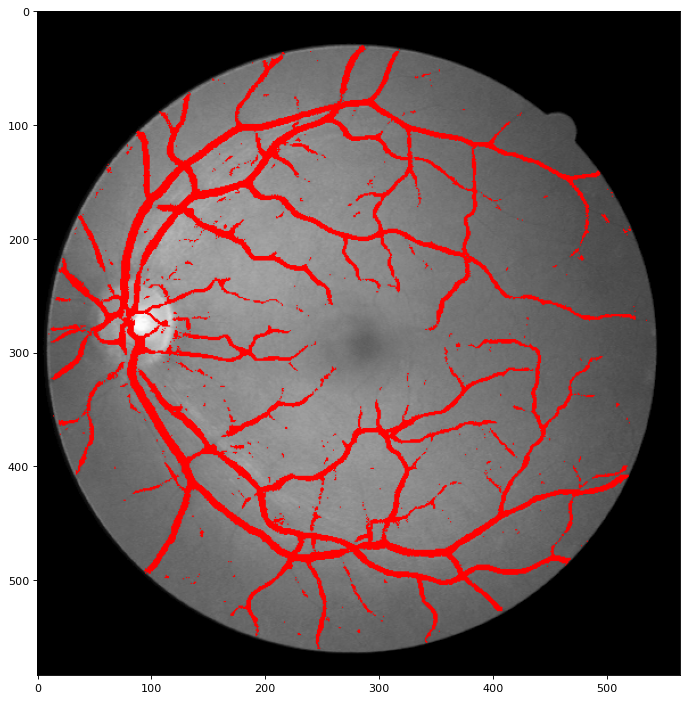

Accuracy score: 0.940267423591425

F1 score: 0.7587692781867539

Confusion matrix:

     t/p      0     1 
        0 1153294 34251 
        1 47147 128015 
Sensivity: 0.7308377387789589
Specificity: 0.971158145586062


(0.94, 0.759, 1153294, 34251, 47147, 128015)

In [25]:
main(lgb='Num', features=features, plot_once=True, recurrence=True, hyperparams=params)

## Gray intensity optimization - Green-Blue - Pyramid

In [26]:
df_train_gb = pd.DataFrame()
df_test_gb = pd.DataFrame()

#for conf in ['_blue', '_blue_lbp_gb', '_green', '_green_lbp_gb']:
for conf in ['_blue_gb', '_green_gb']:

    df_train_riu = pd.read_pickle(f'../DB/DRIVE/extra_features/preprocess_optimization{conf}/train_train_riu_get_pyramid_dataset_lanczos_balance-False_scales-5_x2-True_gray-intensity-True.pkl', compression='gzip')
    df_test_riu = pd.read_pickle(f'../DB/DRIVE/extra_features/preprocess_optimization{conf}/train_test_riu_get_pyramid_dataset_lanczos_balance-False_scales-5_x2-True_gray-intensity-True.pkl', compression='gzip')

    df_train_riu.columns = [c + '_riu' if c not in ['Original', 'label'] else c for c in df_train_riu.columns]
    df_test_riu.columns = [c + '_riu' if c not in ['Original', 'label'] else c for c in df_test_riu.columns]

    if df_train.shape[0] == 0:
        y_train = df_train_riu['label']
        y_test = df_test_riu['label']
    df_train_riu = df_train_riu.drop(['label'], axis=1)
    df_test_riu = df_test_riu.drop(['label'], axis=1)


    df_train_var = pd.read_pickle(f'../DB/DRIVE/extra_features/preprocess_optimization{conf}/train_train_var_get_pyramid_dataset_lanczos_balance-False_scales-5_x2-True_gray-intensity-True.pkl', compression='gzip')
    df_test_var = pd.read_pickle(f'../DB/DRIVE/extra_features/preprocess_optimization{conf}/train_test_var_get_pyramid_dataset_lanczos_balance-False_scales-5_x2-True_gray-intensity-True.pkl', compression='gzip')

    df_train_var.columns = [c + '_var' if c not in ['Original', 'label'] else c for c in df_train_var.columns]
    df_test_var.columns = [c + '_var' if c not in ['Original', 'label'] else c for c in df_test_var.columns]

    df_train_var = df_train_var.drop(['Original', 'label'], axis=1)
    df_test_var = df_test_var.drop(['Original', 'label'], axis=1)

    df_train_temp = pd.concat([df_train_riu, df_train_var], axis=1)
    df_test_temp = pd.concat([df_test_riu, df_test_var], axis=1)
    df_train_temp.columns = [c + conf for c in df_train_temp.columns]
    df_test_temp.columns = [c + conf for c in df_test_temp.columns]

    if df_train_gb.shape[0] > 0:
        df_train_temp.index = df_train_gb.index
        df_test_temp.index = df_test_gb.index
    df_train_gb = pd.concat([df_train_gb, df_train_temp], axis=1)
    df_test_gb = pd.concat([df_test_gb, df_test_temp], axis=1)
    
display(df_train_gb)
display(df_test_gb)

,Original_blue_gb,1:1_riu_blue_gb,1:2_riu_blue_gb,1:4_riu_blue_gb,1:8_riu_blue_gb,2:1_1_riu_blue_gb,2:1_2_riu_blue_gb,2:1_3_riu_blue_gb,2:1_4_riu_blue_gb,1:1_var_blue_gb,...,2:1_3_riu_green_gb,2:1_4_riu_green_gb,1:1_var_green_gb,1:2_var_green_gb,1:4_var_green_gb,1:8_var_green_gb,2:1_1_var_green_gb,2:1_2_var_green_gb,2:1_3_var_green_gb,2:1_4_var_green_gb
0,3.0,3.0,8.0,8.0,8.0,1.0,1.0,8.0,16.0,5.419146,...,8.0,16.0,1.928944,2428.295993,2333.046823,1514.992103,9.0,9.0,22.0,19.0
1,3.0,1.0,8.0,8.0,8.0,4.0,15.0,8.0,4.0,6.738893,...,16.0,27.0,5.805010,2428.295993,2333.046823,1514.992103,9.0,6.0,15.0,12.0
2,3.0,2.0,4.0,8.0,8.0,1.0,1.0,16.0,8.0,17.747614,...,27.0,35.0,20.293456,2419.841751,2225.006539,1514.992103,5.0,3.0,7.0,5.0
3,3.0,0.0,4.0,8.0,8.0,1.0,9.0,16.0,8.0,14.468959,...,35.0,34.0,36.123379,2419.841751,2225.006539,1514.992103,3.0,3.0,5.0,4.0
4,2.0,35.0,8.0,8.0,8.0,1.0,9.0,16.0,16.0,12.585815,...,35.0,35.0,36.227456,2511.032210,2225.006539,1514.992103,3.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226537,3.0,13.0,35.0,34.0,8.0,16.0,16.0,9.0,9.0,2.005834,...,16.0,16.0,219.364441,377.087868,894.347384,1665.399687,150.0,196.0,38.0,25.0
226538,3.0,1.0,35.0,34.0,8.0,16.0,16.0,9.0,9.0,1.512341,...,34.0,35.0,76.087942,377.087868,894.347384,1665.399687,148.0,102.0,14.0,7.0
226539,3.0,9.0,34.0,35.0,8.0,16.0,34.0,9.0,9.0,2.020608,...,18.0,16.0,37.383557,378.503714,900.589429,1665.399687,60.0,15.0,1.0,0.0
226540,3.0,9.0,34.0,35.0,8.0,34.0,27.0,9.0,9.0,1.553162,...,16.0,16.0,36.212577,378.503714,900.589429,1665.399687,2.0,1.0,0.0,0.0


,Original_blue_gb,1:1_riu_blue_gb,1:2_riu_blue_gb,1:4_riu_blue_gb,1:8_riu_blue_gb,2:1_1_riu_blue_gb,2:1_2_riu_blue_gb,2:1_3_riu_blue_gb,2:1_4_riu_blue_gb,1:1_var_blue_gb,...,2:1_3_riu_green_gb,2:1_4_riu_green_gb,1:1_var_green_gb,1:2_var_green_gb,1:4_var_green_gb,1:8_var_green_gb,2:1_1_var_green_gb,2:1_2_var_green_gb,2:1_3_var_green_gb,2:1_4_var_green_gb
0,3.0,8.0,7.0,8.0,8.0,9.0,9.0,35.0,35.0,0.658934,...,35.0,35.0,4.105869,31.055419,1197.906567,774.963408,1.0,2.0,2.0,2.0
1,3.0,16.0,7.0,8.0,8.0,9.0,9.0,35.0,35.0,0.500002,...,35.0,34.0,4.621264,31.055419,1197.906567,774.963408,2.0,2.0,2.0,2.0
2,3.0,16.0,26.0,8.0,8.0,9.0,9.0,35.0,35.0,0.500002,...,35.0,34.0,2.984623,103.912808,1197.906567,774.963408,2.0,2.0,2.0,2.0
3,3.0,16.0,26.0,8.0,8.0,9.0,9.0,35.0,35.0,0.500002,...,35.0,34.0,3.182462,103.912808,1197.906567,774.963408,2.0,1.0,1.0,3.0
4,3.0,16.0,35.0,4.0,8.0,9.0,9.0,35.0,35.0,0.500002,...,35.0,35.0,4.621264,176.520912,1591.822876,774.963408,3.0,3.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226969,3.0,24.0,27.0,8.0,8.0,27.0,16.0,16.0,35.0,5.321979,...,35.0,35.0,23.825452,487.737537,638.741391,579.498642,12.0,15.0,2.0,2.0
226970,3.0,1.0,27.0,8.0,8.0,26.0,35.0,8.0,0.0,6.593633,...,34.0,23.0,18.588637,487.737537,638.741391,579.498642,10.0,7.0,2.0,1.0
226971,3.0,0.0,4.0,4.0,8.0,34.0,35.0,12.0,16.0,6.026710,...,0.0,1.0,45.254184,414.200233,702.657941,640.632333,2.0,1.0,1.0,1.0
226972,3.0,1.0,4.0,4.0,8.0,35.0,34.0,16.0,8.0,6.094610,...,34.0,35.0,16.833851,414.200233,702.657941,640.632333,2.0,3.0,0.0,1.0


Columns: Index([  'Original_blue_lbp_gb',    '1:1_riu_blue_lbp_gb',
          '1:2_riu_blue_lbp_gb',    '1:4_riu_blue_lbp_gb',
          '1:8_riu_blue_lbp_gb',  '2:1_1_riu_blue_lbp_gb',
        '2:1_2_riu_blue_lbp_gb',  '2:1_3_riu_blue_lbp_gb',
        '2:1_4_riu_blue_lbp_gb',    '1:1_var_blue_lbp_gb',
          '1:2_var_blue_lbp_gb',    '1:4_var_blue_lbp_gb',
          '1:8_var_blue_lbp_gb',  '2:1_1_var_blue_lbp_gb',
        '2:1_2_var_blue_lbp_gb',  '2:1_3_var_blue_lbp_gb',
        '2:1_4_var_blue_lbp_gb',  'Original_green_lbp_gb',
         '1:1_riu_green_lbp_gb',   '1:2_riu_green_lbp_gb',
         '1:4_riu_green_lbp_gb',   '1:8_riu_green_lbp_gb',
       '2:1_1_riu_green_lbp_gb', '2:1_2_riu_green_lbp_gb',
       '2:1_3_riu_green_lbp_gb', '2:1_4_riu_green_lbp_gb',
         '1:1_var_green_lbp_gb',   '1:2_var_green_lbp_gb',
         '1:4_var_green_lbp_gb',   '1:8_var_green_lbp_gb',
       '2:1_1_var_green_lbp_gb', '2:1_2_var_green_lbp_gb',
       '2:1_3_var_green_lbp_gb', '2:1_4_var_gre

/home/fer/anaconda3/envs/TFM/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


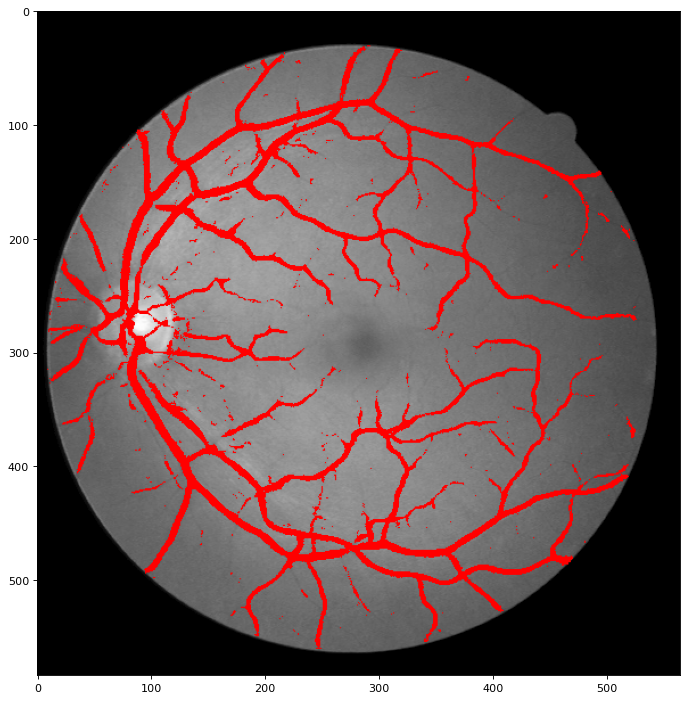

Accuracy score: 0.9401544132377686

F1 score: 0.7594804551326291

Confusion matrix:

     t/p      0     1 
        0 1152398 35147 
        1 46405 128757 
Sensivity: 0.735073817380482
Specificity: 0.9704036478617653


(0.94, 0.759, 1152398, 35147, 46405, 128757)

In [27]:
features['x_train'] = pd.concat([df_train, df_train_gb, conv_features], axis=1)
features['x_test'] = pd.concat([df_test, df_test_gb, conv_features_test], axis=1)
main(lgb='Num', features=features, plot_once=True, recurrence=True, hyperparams=params)